In [4]:
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:


class CNNObjectDetection:
    def __init__(self, num_classes=10, filters=32, kernel=(3, 3), dense_nodes=64):
        self.filters = filters
        self.kernel = kernel
        self.dense_nodes = dense_nodes
        self.num_classes = num_classes
        self.model = self.create_model()

    def create_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(self.filters, self.kernel, activation='relu', input_shape=(32, 32, 3)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(self.dense_nodes, activation='relu'),
            tf.keras.layers.Dense(self.num_classes, activation='softmax')
        ])
        return model

    def train_model(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        # Compile the model
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

        return history

    def plot_accuracy(self, history):
        # Plot accuracy graph
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    def plot_loss(self, history):
        # Plot loss graph
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        plt.show()

    def evaluate_model(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print("Test Loss:", loss)
        print("Test Accuracy:", accuracy)

    def run(self, X_train, y_train, X_val, y_val, X_test, y_test, epochs=10, batch_size=32, plot=False):
        history = self.train_model(X_train, y_train, X_val, y_val, epochs, batch_size)

        if plot: self.plot_accuracy(history)
        if plot: self.plot_loss(history)

        self.evaluate_model(X_test, y_test)


Epoch 1/20
313/313 [==============================] - 17s 51ms/step - loss: 1.6987 - accuracy: 0.3943 - val_loss: 1.4317 - val_accuracy: 0.4904
Epoch 2/20
313/313 [==============================] - 14s 45ms/step - loss: 1.3364 - accuracy: 0.5313 - val_loss: 1.2841 - val_accuracy: 0.5516
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 1.2305 - accuracy: 0.5709 - val_loss: 1.2312 - val_accuracy: 0.5673
Epoch 4/20
313/313 [==============================] - 14s 44ms/step - loss: 1.1460 - accuracy: 0.6030 - val_loss: 1.1800 - val_accuracy: 0.5901
Epoch 5/20
313/313 [==============================] - 14s 45ms/step - loss: 1.0991 - accuracy: 0.6174 - val_loss: 1.1434 - val_accuracy: 0.6028
Epoch 6/20
313/313 [==============================] - 14s 44ms/step - loss: 1.0554 - accuracy: 0.6330 - val_loss: 1.1114 - val_accuracy: 0.6146
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 1.0185 - accuracy: 0.6467 - val_loss: 1.1128 - val_accuracy:

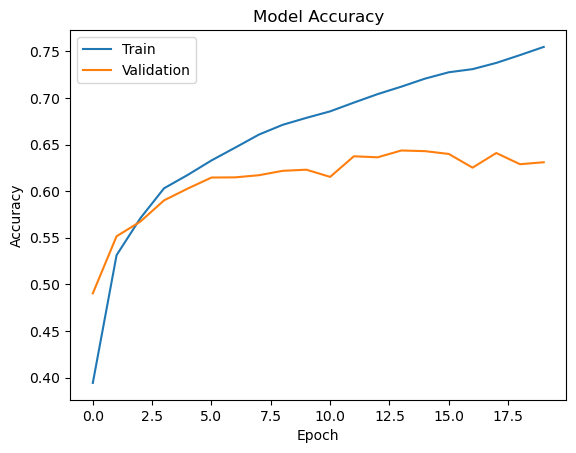

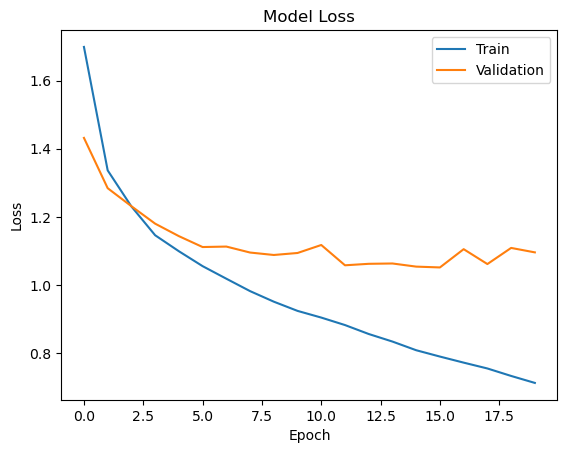

313/313 [==============================] - 2s 5ms/step - loss: 1.1068 - accuracy: 0.6290
Test Loss: 1.106818675994873
Test Accuracy: 0.6290000081062317


In [6]:


# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, random_state=42)

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create and train the model
cnn = CNNObjectDetection(num_classes=10, filters=32, kernel=(3, 3), dense_nodes=64)
cnn.run(X_train, y_train, 
        X_val, y_val, 
        X_test, y_test, 
        epochs=20, batch_size=128,
        plot=True)
